<a href="https://colab.research.google.com/github/qTronor/BigData_lessons/blob/main/BigData_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/AI_Datasets/BigData_8/Market_Basket_Optimisation.csv")

In [ ]:
df.head()

,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
0,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,low fat yogurt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   shrimp             7500 non-null   object 
 1   almonds            5746 non-null   object 
 2   avocado            4388 non-null   object 
 3   vegetables mix     3344 non-null   object 
 4   green grapes       2528 non-null   object 
 5   whole weat flour   1863 non-null   object 
 6   yams               1368 non-null   object 
 7   cottage cheese     980 non-null    object 
 8   energy drink       653 non-null    object 
 9   tomato juice       394 non-null    object 
 10  low fat yogurt     255 non-null    object 
 11  green tea          153 non-null    object 
 12  honey              86 non-null     object 
 13  salad              46 non-null     object 
 14  mineral water      24 non-null     object 
 15  salmon             7 non-null      object 
 16  antioxydant juice  3 non

In [ ]:
df.stack().value_counts()

mineral water    1787
eggs             1348
spaghetti        1306
french fries     1282
chocolate        1230
                 ... 
bramble            14
cream               7
napkins             5
water spray         3
 asparagus          1
Length: 120, dtype: int64

In [ ]:
df.stack().value_counts(normalize = True)

mineral water    0.060900
eggs             0.045939
spaghetti        0.044508
french fries     0.043690
chocolate        0.041918
                   ...   
bramble          0.000477
cream            0.000239
napkins          0.000170
water spray      0.000102
 asparagus       0.000034
Length: 120, dtype: float64

Относительная частота

<Axes: >

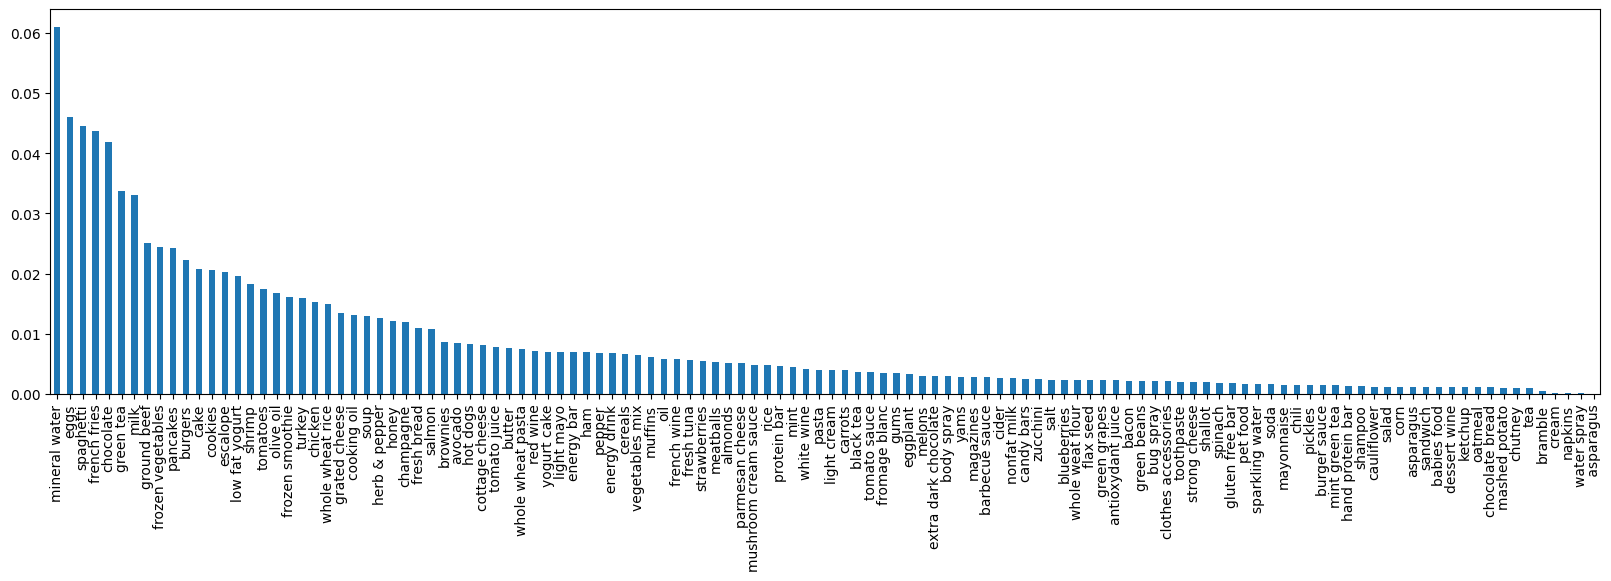

In [ ]:
df.stack().value_counts(normalize=True).plot(kind="bar", figsize=(20, 5))

<Axes: >

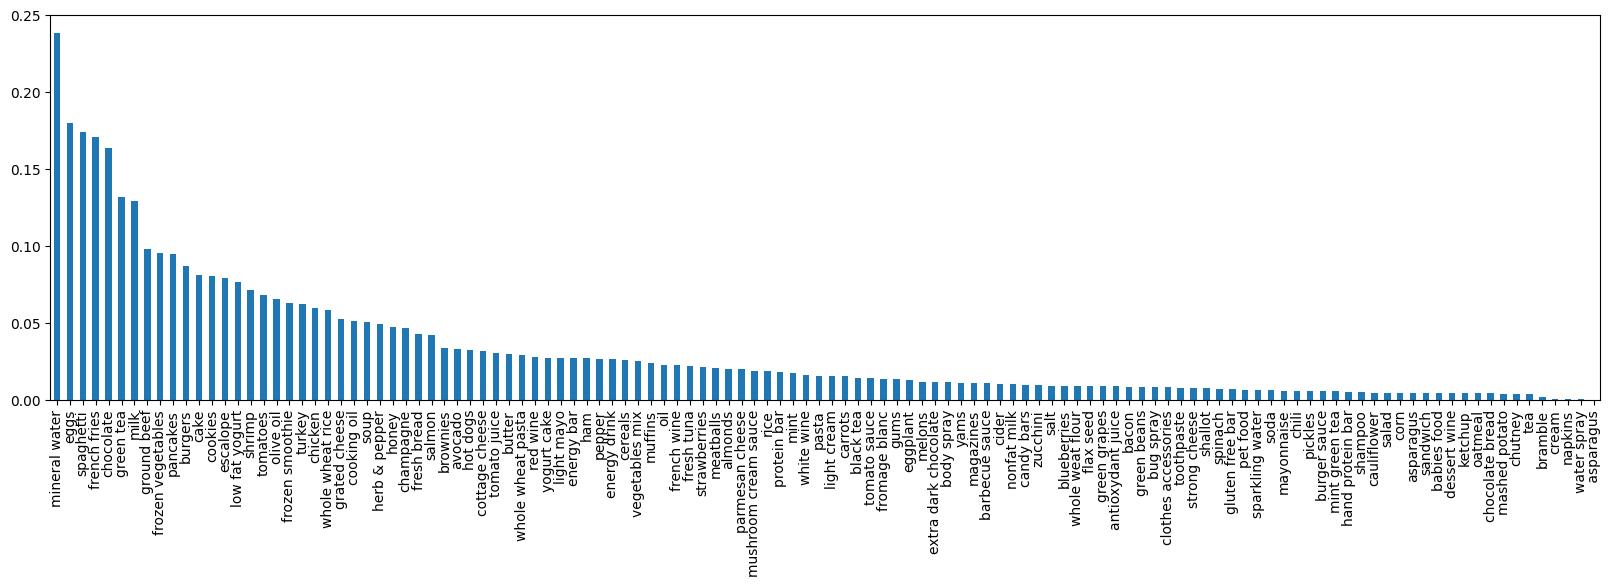

In [ ]:
df.stack().value_counts().apply(lambda item: item / df.shape[0]).plot(kind="bar", figsize=(20, 5))

<Axes: >

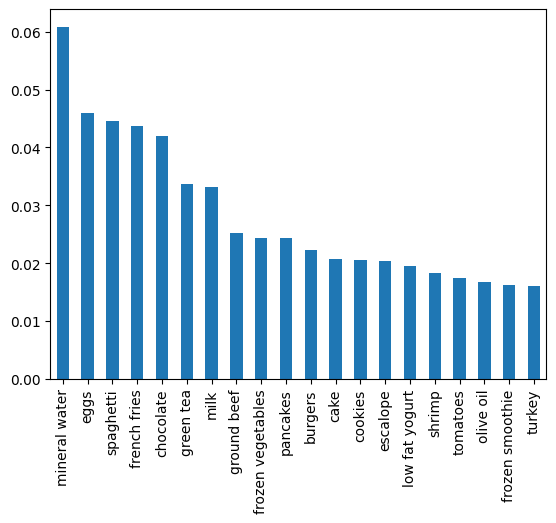

In [ ]:
top_20_products = df.stack().value_counts(normalize=True).nlargest(20)

top_20_products.plot(kind="bar")

<Axes: >

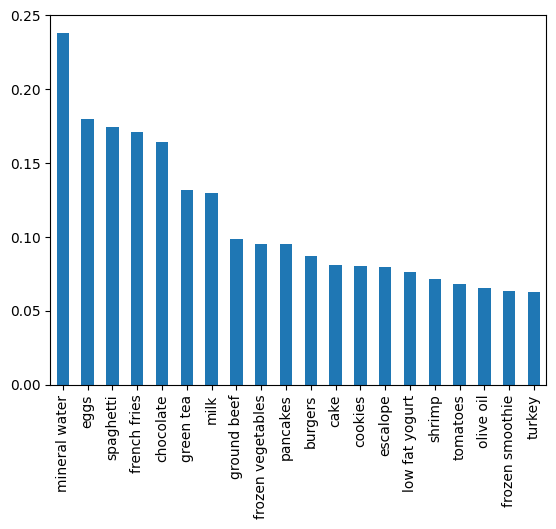

In [ ]:
top_20_products = df.stack().value_counts().apply(lambda item: item / df.shape[0]).nlargest(20)

top_20_products.plot(kind="bar")

In [ ]:
transactions = []
for i in range(df.shape[0]):
  row = df.iloc[i].dropna().tolist()
  transactions.append(row)

In [ ]:
!pip install apriori_python

In [ ]:
from apriori_python import apriori
import time

In [ ]:
t = []
start = time.perf_counter()

t1, rules = apriori(transactions, minSup = 0.4, minConf = 0.2)
time1 = (time.perf_counter()-start)
t.append(time1)

In [ ]:
rules

[]

In [ ]:
#transactions = df.apply(lambda x: x.dropna().tolist(), axis=1).tolist()
t = []
start = time.perf_counter()

result = apriori(transactions, minSup=0.04, minConf=0.2)

time1 = (time.perf_counter()-start)
t.append(time1)
for rule in result:
    print(rule)


{1: {frozenset({'cookies'}), frozenset({'whole wheat rice'}), frozenset({'ground beef'}), frozenset({'chocolate'}), frozenset({'burgers'}), frozenset({'green tea'}), frozenset({'chicken'}), frozenset({'shrimp'}), frozenset({'champagne'}), frozenset({'escalope'}), frozenset({'pancakes'}), frozenset({'salmon'}), frozenset({'frozen smoothie'}), frozenset({'turkey'}), frozenset({'herb & pepper'}), frozenset({'olive oil'}), frozenset({'tomatoes'}), frozenset({'spaghetti'}), frozenset({'grated cheese'}), frozenset({'soup'}), frozenset({'frozen vegetables'}), frozenset({'honey'}), frozenset({'french fries'}), frozenset({'milk'}), frozenset({'eggs'}), frozenset({'low fat yogurt'}), frozenset({'fresh bread'}), frozenset({'cooking oil'}), frozenset({'cake'}), frozenset({'mineral water'})}, 2: {frozenset({'mineral water', 'eggs'}), frozenset({'spaghetti', 'mineral water'}), frozenset({'mineral water', 'milk'}), frozenset({'mineral water', 'chocolate'}), frozenset({'ground beef', 'mineral water'})

In [ ]:
t

[3.1473000240002875]

In [ ]:
result

({1: {frozenset({'cookies'}),
   frozenset({'whole wheat rice'}),
   frozenset({'ground beef'}),
   frozenset({'chocolate'}),
   frozenset({'burgers'}),
   frozenset({'green tea'}),
   frozenset({'chicken'}),
   frozenset({'shrimp'}),
   frozenset({'champagne'}),
   frozenset({'escalope'}),
   frozenset({'pancakes'}),
   frozenset({'salmon'}),
   frozenset({'frozen smoothie'}),
   frozenset({'turkey'}),
   frozenset({'herb & pepper'}),
   frozenset({'olive oil'}),
   frozenset({'tomatoes'}),
   frozenset({'spaghetti'}),
   frozenset({'grated cheese'}),
   frozenset({'soup'}),
   frozenset({'frozen vegetables'}),
   frozenset({'honey'}),
   frozenset({'french fries'}),
   frozenset({'milk'}),
   frozenset({'eggs'}),
   frozenset({'low fat yogurt'}),
   frozenset({'fresh bread'}),
   frozenset({'cooking oil'}),
   frozenset({'cake'}),
   frozenset({'mineral water'})},
  2: {frozenset({'eggs', 'mineral water'}),
   frozenset({'mineral water', 'spaghetti'}),
   frozenset({'milk', 'mineral 

In [ ]:
!pip install apyori

  Preparing metadata (setup.py) ... done
  Created wheel for apyori: filename=apyori-1.1.2-py3-none-any.whl size=5955 sha256=40a0b738a7c20c145f6499e769d077f17c7dbffca881c1300fc8a1f233081386
  Stored in directory: /root/.cache/pip/wheels/c4/1a/79/20f55c470a50bb3702a8cb7c94d8ada15573538c7f4baebe2d
Successfully built apyori


In [ ]:
from apyori import apriori

In [ ]:
start_time = time.perf_counter()
rules = apriori(transactions=transactions,
                min_support = 0.04,
                min_confidence = 0.2,
                min_lift = 1.0001)

results = list(rules)
time2 = (time.perf_counter()-start)
t.append(time2)

In [ ]:
results

[RelationRecord(items=frozenset({'mineral water', 'chocolate'}), support=0.05266666666666667, ordered_statistics=[OrderedStatistic(items_base=frozenset({'chocolate'}), items_add=frozenset({'mineral water'}), confidence=0.32139951179820997, lift=1.3489067367020564), OrderedStatistic(items_base=frozenset({'mineral water'}), items_add=frozenset({'chocolate'}), confidence=0.22104085058757697, lift=1.3489067367020564)]),
 RelationRecord(items=frozenset({'mineral water', 'eggs'}), support=0.05093333333333333, ordered_statistics=[OrderedStatistic(items_base=frozenset({'eggs'}), items_add=frozenset({'mineral water'}), confidence=0.28338278931750743, lift=1.1893513821383916), OrderedStatistic(items_base=frozenset({'mineral water'}), items_add=frozenset({'eggs'}), confidence=0.21376608841634023, lift=1.1893513821383916)]),
 RelationRecord(items=frozenset({'ground beef', 'mineral water'}), support=0.040933333333333335, ordered_statistics=[OrderedStatistic(items_base=frozenset({'ground beef'}), it

In [ ]:
for result in results:
  for subset in result[2]:
    print(subset[0], subset[1])
    print("Support: {0}; Confidence: {1}, Lift: {3};".format(result[1],subset[2],subset[3]))
    print()

In [ ]:
!pip install efficient_apriori

In [ ]:
from efficient_apriori import apriori

In [ ]:
start_time = time.perf_counter()
itemsets, rules = apriori(transactions=transactions,
                min_support = 0.04,
                min_confidence = 0.2)

time3 = (time.perf_counter()-start)
t.append(time3)

In [ ]:
for i in range(len(rules)):
  print(rules[i])

{mineral water} -> {chocolate} (conf: 0.221, supp: 0.053, lift: 1.349, conv: 1.073)
{chocolate} -> {mineral water} (conf: 0.321, supp: 0.053, lift: 1.349, conv: 1.123)
{mineral water} -> {eggs} (conf: 0.214, supp: 0.051, lift: 1.189, conv: 1.043)
{eggs} -> {mineral water} (conf: 0.283, supp: 0.051, lift: 1.189, conv: 1.063)
{ground beef} -> {mineral water} (conf: 0.417, supp: 0.041, lift: 1.748, conv: 1.306)
{mineral water} -> {milk} (conf: 0.201, supp: 0.048, lift: 1.554, conv: 1.090)
{milk} -> {mineral water} (conf: 0.370, supp: 0.048, lift: 1.554, conv: 1.210)
{spaghetti} -> {mineral water} (conf: 0.343, supp: 0.060, lift: 1.440, conv: 1.159)
{mineral water} -> {spaghetti} (conf: 0.251, supp: 0.060, lift: 1.440, conv: 1.102)


In [ ]:
!pip install fpgrowth_py

In [ ]:
from fpgrowth_py import fpgrowth

In [ ]:
start_time = time.perf_counter()
itemsets, rules = fpgrowth(transactions,
                minSupRatio = 0.04,
                minConf = 0.2)

time4 = (time.perf_counter()-start)
t.append(time4)

In [ ]:
for i in range(len(rules)):
  print(rules[i])

[{'ground beef'}, {'mineral water'}, 0.41655359565807326]
[{'mineral water'}, {'milk'}, 0.20145495243424735]
[{'milk'}, {'mineral water'}, 0.37037037037037035]
[{'mineral water'}, {'chocolate'}, 0.22104085058757694]
[{'chocolate'}, {'mineral water'}, 0.3213995117982099]
[{'spaghetti'}, {'mineral water'}, 0.3430321592649311]
[{'mineral water'}, {'spaghetti'}, 0.2506994963626189]
[{'mineral water'}, {'eggs'}, 0.21376608841634023]
[{'eggs'}, {'mineral water'}, 0.28338278931750743]


In [ ]:
t

[3.1473000240002875, 14.263764354000159, 22.376936943000146, 27.60263704299996]

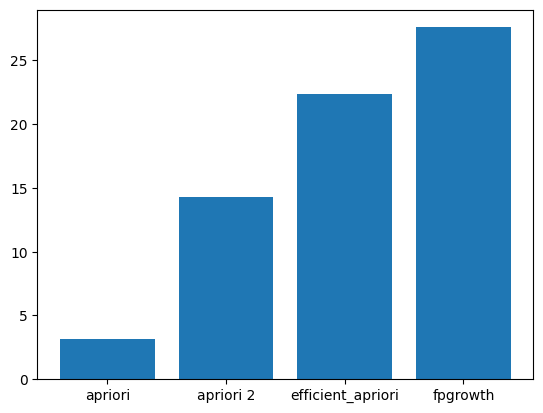

In [ ]:
plt.bar(["apriori", "apriori 2", "efficient_apriori", "fpgrowth"], t)
plt.show()

# Часть 2

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/AI_Datasets/BigData_8/data(1).csv")

In [ ]:
df.head()

,Bread,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11
0,Scandinavian,Scandinavian,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Hot chocolate,Jam,Cookies,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Muffin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Coffee,Pastry,Bread,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Medialuna,Pastry,Muffin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9530 entries, 0 to 9529
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Bread        9207 non-null   object
 1   Unnamed: 1   5840 non-null   object
 2   Unnamed: 2   2959 non-null   object
 3   Unnamed: 3   1505 non-null   object
 4   Unnamed: 4   596 non-null    object
 5   Unnamed: 5   245 non-null    object
 6   Unnamed: 6   91 non-null     object
 7   Unnamed: 7   36 non-null     object
 8   Unnamed: 8   13 non-null     object
 9   Unnamed: 9   9 non-null      object
 10  Unnamed: 10  4 non-null      object
 11  Unnamed: 11  1 non-null      object
dtypes: object(12)
memory usage: 893.6+ KB


In [ ]:
df.stack().value_counts()

Coffee              5471
Bread               3324
Tea                 1435
Cake                1025
Pastry               856
                    ... 
Olum & polenta         1
Gift voucher           1
Coffee granules        1
Raw bars               1
Chicken sand           1
Length: 102, dtype: int64

In [ ]:
df.stack().value_counts(normalize = True)

Coffee              0.266800
Bread               0.162099
Tea                 0.069980
Cake                0.049985
Pastry              0.041744
                      ...   
Olum & polenta      0.000049
Gift voucher        0.000049
Coffee granules     0.000049
Raw bars            0.000049
Chicken sand        0.000049
Length: 102, dtype: float64

<Axes: >

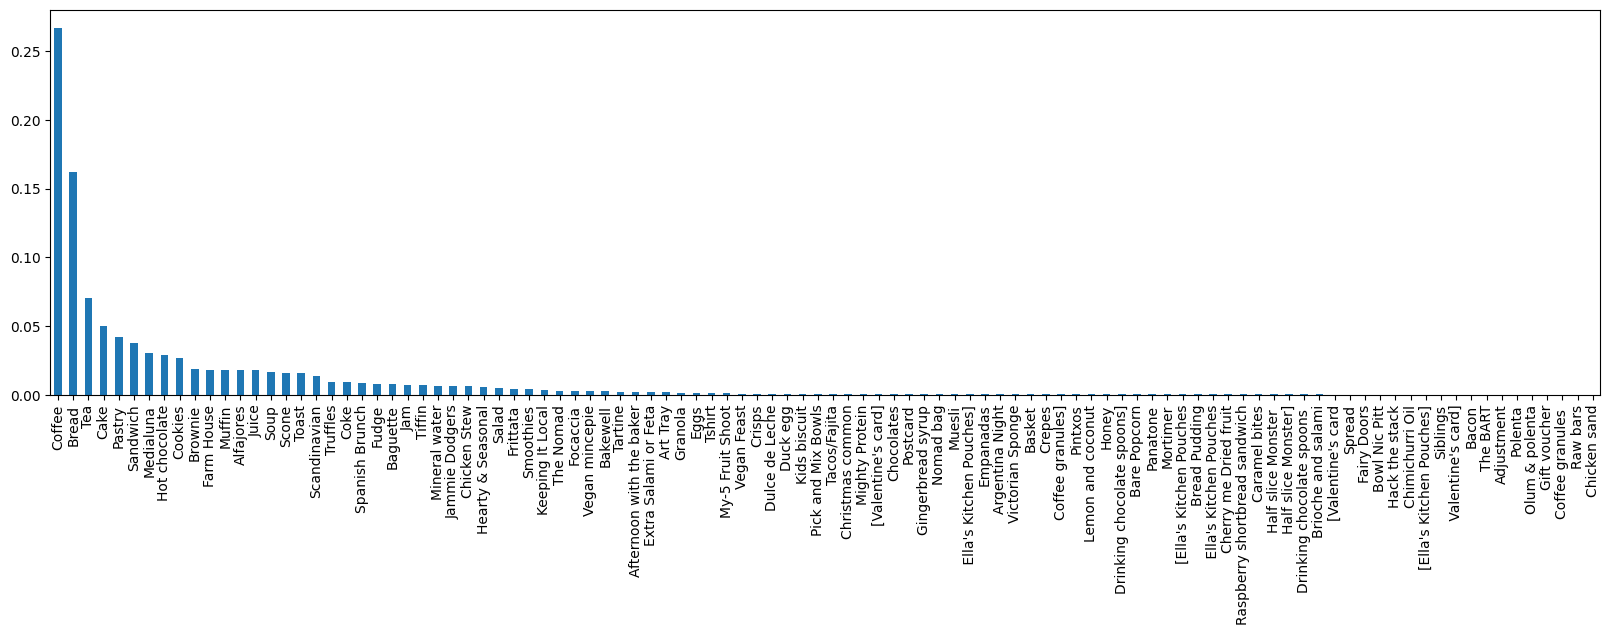

In [ ]:
df.stack().value_counts(normalize=True).plot(kind="bar", figsize=(20, 5))

<Axes: >

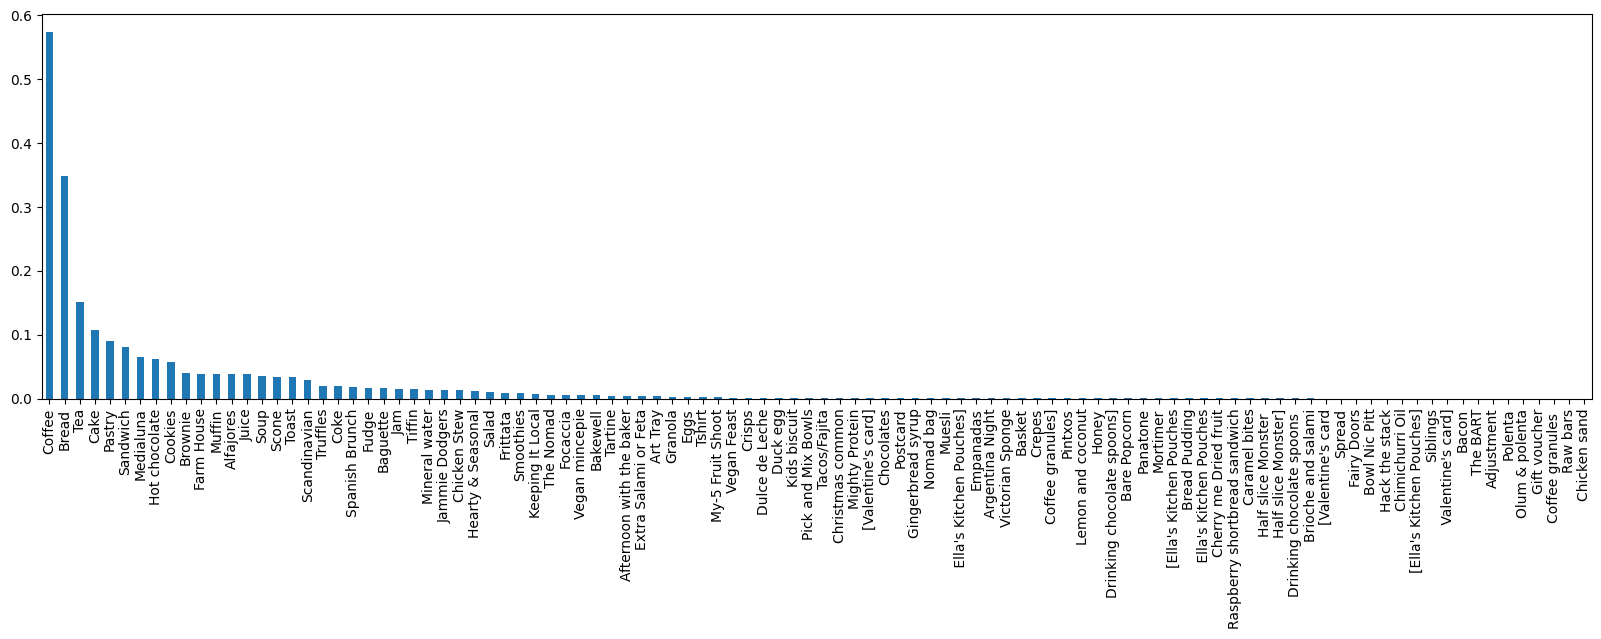

In [ ]:
df.stack().value_counts().apply(lambda item: item / df.shape[0]).plot(kind="bar", figsize=(20, 5))

<Axes: >

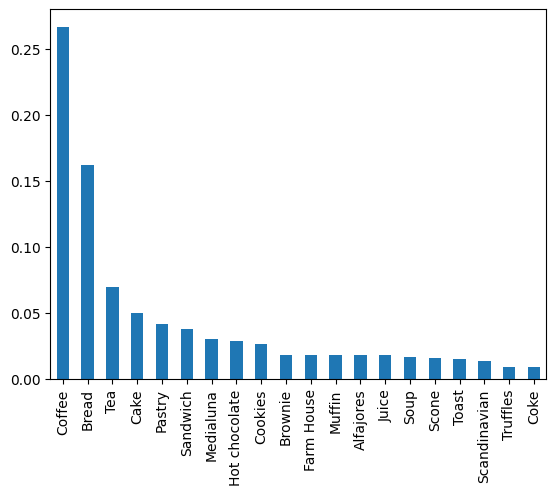

In [ ]:
top_20_products = df.stack().value_counts(normalize=True).nlargest(20)

top_20_products.plot(kind="bar")

<Axes: >

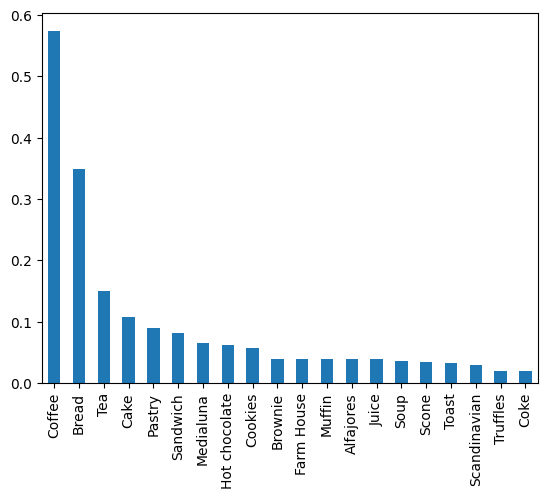

In [ ]:
top_20_products = df.stack().value_counts().apply(lambda item: item / df.shape[0]).nlargest(20)

top_20_products.plot(kind="bar")

In [ ]:
transactions = []
for i in range(df.shape[0]):
  row = df.iloc[i].dropna().tolist()
  transactions.append(row)

In [ ]:
from apriori_python import apriori
import time

In [ ]:
#transactions = df.apply(lambda x: x.dropna().tolist(), axis=1).tolist()
t = []
start = time.perf_counter()

result = apriori(transactions, minSup=0.03, minConf=0.1)

time1 = (time.perf_counter()-start)
t.append(time1)
for rule in result:
    print(rule)


{1: {frozenset({'Pastry'}), frozenset({'Cookies'}), frozenset({'Tea'}), frozenset({'Cake'}), frozenset({'Hot chocolate'}), frozenset({'Soup'}), frozenset({'Toast'}), frozenset({'Alfajores'}), frozenset({'Farm House'}), frozenset({'Brownie'}), frozenset({'Muffin'}), frozenset({'Bread'}), frozenset({'Juice'}), frozenset({'Coffee'}), frozenset({'Sandwich'}), frozenset({'Scone'}), frozenset({'Medialuna'})}, 2: {frozenset({'Tea', 'Coffee'}), frozenset({'Coffee', 'Cake'}), frozenset({'Pastry', 'Coffee'}), frozenset({'Coffee', 'Sandwich'}), frozenset({'Medialuna', 'Coffee'}), frozenset({'Bread', 'Coffee'})}}
[[{'Coffee'}, {'Tea'}, 0.10424028268551237], [{'Coffee'}, {'Cake'}, 0.11439929328621908], [{'Coffee'}, {'Bread'}, 0.1881625441696113], [{'Bread'}, {'Coffee'}, 0.2751937984496124], [{'Tea'}, {'Coffee'}, 0.3496296296296296], [{'Cake'}, {'Coffee'}, 0.5269582909460834], [{'Sandwich'}, {'Coffee'}, 0.5323529411764706], [{'Pastry'}, {'Coffee'}, 0.5521472392638037], [{'Medialuna'}, {'Coffee'}, 0.

In [ ]:
result

({1: {frozenset({'Pastry'}),
   frozenset({'Cookies'}),
   frozenset({'Tea'}),
   frozenset({'Cake'}),
   frozenset({'Hot chocolate'}),
   frozenset({'Soup'}),
   frozenset({'Toast'}),
   frozenset({'Alfajores'}),
   frozenset({'Farm House'}),
   frozenset({'Brownie'}),
   frozenset({'Muffin'}),
   frozenset({'Bread'}),
   frozenset({'Juice'}),
   frozenset({'Coffee'}),
   frozenset({'Sandwich'}),
   frozenset({'Scone'}),
   frozenset({'Medialuna'})},
  2: {frozenset({'Coffee', 'Tea'}),
   frozenset({'Cake', 'Coffee'}),
   frozenset({'Coffee', 'Pastry'}),
   frozenset({'Coffee', 'Sandwich'}),
   frozenset({'Coffee', 'Medialuna'}),
   frozenset({'Bread', 'Coffee'})}},
 [[{'Coffee'}, {'Tea'}, 0.10424028268551237],
  [{'Coffee'}, {'Cake'}, 0.11439929328621908],
  [{'Coffee'}, {'Bread'}, 0.1881625441696113],
  [{'Bread'}, {'Coffee'}, 0.2751937984496124],
  [{'Tea'}, {'Coffee'}, 0.3496296296296296],
  [{'Cake'}, {'Coffee'}, 0.5269582909460834],
  [{'Sandwich'}, {'Coffee'}, 0.532352941176470

In [ ]:
from apyori import apriori

In [ ]:
start_time = time.perf_counter()
rules = apriori(transactions=transactions,
                min_support = 0.02,
                min_confidence = 0.2,
                min_lift = 1.0001)

results = list(rules)
time2 = (time.perf_counter()-start)
t.append(time2)

In [ ]:
results

[RelationRecord(items=frozenset({'Bread', 'Pastry'}), support=0.028961175236096537, ordered_statistics=[OrderedStatistic(items_base=frozenset({'Pastry'}), items_add=frozenset({'Bread'}), confidence=0.33865030674846625, lift=1.0424216483568745)]),
 RelationRecord(items=frozenset({'Coffee', 'Cake'}), support=0.05435466946484785, ordered_statistics=[OrderedStatistic(items_base=frozenset({'Cake'}), items_add=frozenset({'Coffee'}), confidence=0.5269582909460834, lift=1.109079618532724)]),
 RelationRecord(items=frozenset({'Tea', 'Cake'}), support=0.0236096537250787, ordered_statistics=[OrderedStatistic(items_base=frozenset({'Cake'}), items_add=frozenset({'Tea'}), confidence=0.2288911495422177, lift=1.615801966768396)]),
 RelationRecord(items=frozenset({'Coffee', 'Cookies'}), support=0.02801678908709339, ordered_statistics=[OrderedStatistic(items_base=frozenset({'Cookies'}), items_add=frozenset({'Coffee'}), confidence=0.5184466019417475, lift=1.0911652200761603)]),
 RelationRecord(items=froze

In [ ]:
from efficient_apriori import apriori

In [ ]:
start_time = time.perf_counter()
itemsets, rules = apriori(transactions=transactions,
                min_support = 0.025,
                min_confidence = 0.2)

time3 = (time.perf_counter()-start)
t.append(time3)

In [ ]:
for i in range(len(rules)):
  print(rules[i])

{Bread} -> {Coffee} (conf: 0.275, supp: 0.089, lift: 0.579, conv: 0.724)
{Pastry} -> {Bread} (conf: 0.339, supp: 0.029, lift: 1.042, conv: 1.021)
{Cake} -> {Coffee} (conf: 0.527, supp: 0.054, lift: 1.109, conv: 1.110)
{Cookies} -> {Coffee} (conf: 0.518, supp: 0.028, lift: 1.091, conv: 1.090)
{Hot chocolate} -> {Coffee} (conf: 0.507, supp: 0.029, lift: 1.068, conv: 1.065)
{Medialuna} -> {Coffee} (conf: 0.569, supp: 0.035, lift: 1.198, conv: 1.218)
{Pastry} -> {Coffee} (conf: 0.552, supp: 0.047, lift: 1.162, conv: 1.172)
{Sandwich} -> {Coffee} (conf: 0.532, supp: 0.038, lift: 1.120, conv: 1.122)
{Tea} -> {Coffee} (conf: 0.350, supp: 0.050, lift: 0.736, conv: 0.807)


In [ ]:
from fpgrowth_py import fpgrowth

In [ ]:
start_time = time.perf_counter()
itemsets, rules = fpgrowth(transactions,
                minSupRatio = 0.035,
                minConf = 0.15)

time4 = (time.perf_counter()-start)
t.append(time4)

In [ ]:
for i in range(len(rules)):
  print(rules[i])

[{'Cookies'}, {'Coffee'}, 0.5184466019417475]
[{'Hot chocolate'}, {'Coffee'}, 0.5072463768115942]
[{'Medialuna'}, {'Coffee'}, 0.5692307692307692]
[{'Sandwich'}, {'Coffee'}, 0.5323529411764706]
[{'Pastry'}, {'Coffee'}, 0.5521472392638037]
[{'Cake'}, {'Coffee'}, 0.5269582909460834]
[{'Tea'}, {'Coffee'}, 0.3496296296296296]
[{'Bread'}, {'Coffee'}, 0.2751937984496124]
[{'Coffee'}, {'Bread'}, 0.1881625441696113]


In [ ]:
t

[0.5827064310001333, 5.0583405769998535, 8.38849034499981, 11.75144661100012]

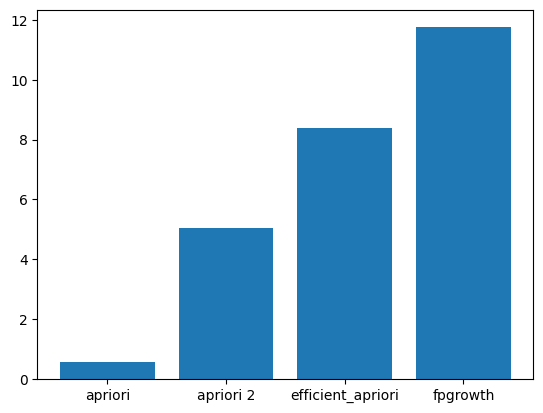

In [ ]:
plt.bar(["apriori", "apriori 2", "efficient_apriori", "fpgrowth"], t)
plt.show()